In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
import re 
import string
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#listdir returns a list containing the names of the entries in the directory given as a parameter
labels = os.listdir('./dataset_') 

# tf.keras.preprocessing.text_dataset_from_directory Generates a 
# tf.data.Dataset from text files in a directory.
raw_data = tf.keras.preprocessing.text_dataset_from_directory(
    './dataset_',
    # "inferred" : the labels are generated from the directory structure
    labels = "inferred",
    # "int": the labels are encoded as integers
    label_mode = "int",
    # Maximum size of a text string. Texts longer than this will be shortened 
    # to max_length unless it's None ra7at explanation f kil zit.
    max_length = None,
    # Whether to shuffle the data. If False, sorts the data in alphanumeric order.
    shuffle=True,
    # Finally haja fahmetha mn bkri
    seed=11,
    # Optional float between 0 and 1, fraction of data to reserve for validation
    validation_split=None,
    # Only used if validation_split is set, mahich set alors sotit
    subset=None,
)

Found 423 files belonging to 4 classes.


In [4]:
print("Classes names:\n",raw_data.class_names)

Classes names:
 ['Culture', 'Medical', 'Politics', 'Tech']


In [5]:
type(raw_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [6]:
x=[]
y=[]
for text_batch, label_batch in raw_data:
    for i in range(len(text_batch)):
        s=text_batch.numpy()[i].decode("utf-8") 
        x.append(s)
        y.append(raw_data.class_names[label_batch.numpy()[i]])
print(len(x))
print(len(y))

423
423


In [7]:
type(x)

list

In [8]:
x[:30]

['استأجرت مفوضية الانتخابات في العراق قمراً صناعياً لنقل بيانات الناخبين من 45 ألف محطة انتخابية في عموم العراق إلى المركز الوطني في العاصمة بغداد خلال فترة لا تتخطى الساعة الواحدة. كما ستدخل مفوضية الانتخابات للمرة الأولى أجهزة الكترونية في السباق الانتخابي، بعدما تعاقدت مع إحدى الشركات من كوريا الجنوبية لشراء 59 ألف جهاز مسرع للنتائج بكلفة ناهزت 97 ألف دولار. وستساهم هذه التجهيزات في الحد من فرص التلاعب والتزوير، وبالتالي ستعطي كل كيان أصواته الحقيقية وفق الرئيس السابق للمفوضية سربست مصطفى، الذي قال إن هذه التجهيزات تستخدم في العديد من الدول كروسيا والولايات المتحدة وغيرهما، موضحا أن التصويت لن يكون الكترونيا في هذه الانتخابات وإنما ورقياً.يذكر أن الانتخابات التشريعية العراقية المزمع عقدها في 12 مايو  2018 هي ثاني انتخابات عراقية منذ الانسحاب الأمريكي من العراق عام 2011، ورابع انتخابات منذ الغزو الأمريكي للعراق عام 2003، وستفضي إلى انتخاب 328 عضواً في مجلس النواب العراقي والذي بدوره ينتخب رئيس الوزراء العراقي ورئيس الجمهورية.',
 'انتهى منذ أيام فريق المسلسل التلفزيوني الجديد "بعد الن

In [9]:
y[:30]

['Politics',
 'Culture',
 'Medical',
 'Politics',
 'Medical',
 'Medical',
 'Culture',
 'Tech',
 'Politics',
 'Politics',
 'Politics',
 'Culture',
 'Medical',
 'Culture',
 'Culture',
 'Tech',
 'Tech',
 'Tech',
 'Medical',
 'Culture',
 'Culture',
 'Tech',
 'Medical',
 'Medical',
 'Politics',
 'Culture',
 'Politics',
 'Politics',
 'Culture',
 'Culture']

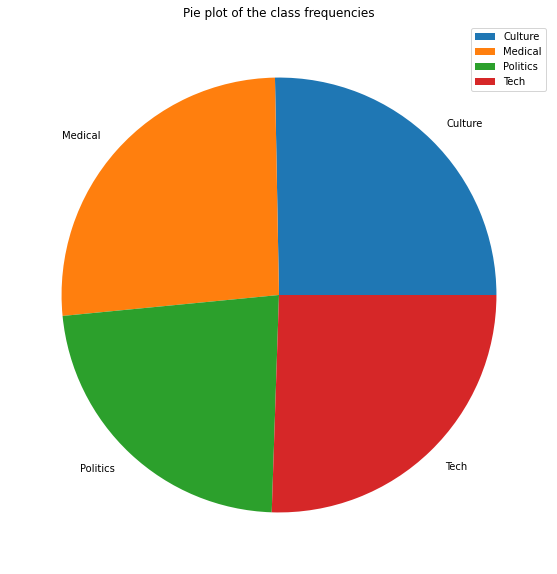

In [10]:
unique, counts = np.unique(y, return_counts=True)
plt.figure("classe Pie", figsize=(10, 10))
plt.title("Pie plot of the class frequencies")
plt.pie(counts, labels=labels)
plt.legend(unique)
plt.show()

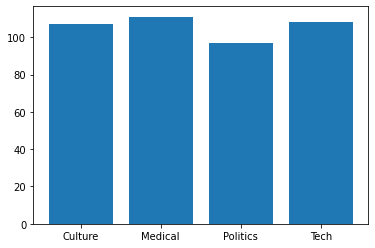

In [11]:
plt.bar( labels,counts)
plt.show();

In [12]:
data =pd.DataFrame({"text":x,"label":y}) 

In [13]:
data.head()

,text,label
0,استأجرت مفوضية الانتخابات في العراق قمراً صناع...,Politics
1,انتهى منذ أيام فريق المسلسل التلفزيوني الجديد ...,Culture
2,رغم صغر سنها، قد تكون طفلة تبلغ من العمر 8 سنو...,Medical
3,قال رئيس الوزراء الإسرائيلي بنيامين نتنياهو تع...,Politics
4,كشفت دراسة حديثة أن النساء اللائي يرغبن في الح...,Medical


In [14]:
data.to_csv('file1.csv')

In [15]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    423 non-null    object
 1   label   423 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB


In [17]:
data.shape

(423, 2)

In [18]:
data.duplicated().sum()

0

In [19]:
data['label'].value_counts()

Medical     111
Tech        108
Culture     107
Politics     97
Name: label, dtype: int64

In [20]:
category = data['label'].unique()
print(category)

['Politics' 'Culture' 'Medical' 'Tech']


In [21]:
data['labelId'] = data['label'].factorize()[0]
data.head()

,text,label,labelId
0,استأجرت مفوضية الانتخابات في العراق قمراً صناع...,Politics,0
1,انتهى منذ أيام فريق المسلسل التلفزيوني الجديد ...,Culture,1
2,رغم صغر سنها، قد تكون طفلة تبلغ من العمر 8 سنو...,Medical,2
3,قال رئيس الوزراء الإسرائيلي بنيامين نتنياهو تع...,Politics,0
4,كشفت دراسة حديثة أن النساء اللائي يرغبن في الح...,Medical,2


In [22]:
category = data[['label', 'labelId']].drop_duplicates().sort_values('labelId')
category

,label,labelId
0,Politics,0
1,Culture,1
2,Medical,2
7,Tech,3


In [23]:
stop_words = list(set(stopwords.words('arabic')))
print(stop_words)

['صار', 'مادام', 'كأيّن', 'بطآن', 'ت', 'قاطبة', 'ذلك', 'عاشر', 'سرعان', 'جانفي', 'خمسين', 'ميم', 'ثلاثة', 'تشرين', 'قاف', 'يونيو', 'عشرون', 'ألف', 'ثمانية', 'الألاء', 'إذا', 'لست', 'تِي', 'أوت', 'ئ', 'لكنَّ', 'ظلّ', 'آ', 'إلى', 'مازال', 'غير', 'أخو', 'لدى', 'ق', 'اللتين', 'لا سيما', 'وُشْكَانَ', 'متى', 'ست', 'آب', 'عاد', 'منها', 'هَذِه', 'مارس', 'إنما', 'ذواتي', 'إنا', 'أنبأ', 'أخٌ', 'خمسون', 'كيت', 'هذان', 'على', 'تَيْنِ', 'ثاء', 'كذا', 'دونك', 'رُبَّ', 'هَجْ', 'ف', 'فلا', 'ارتدّ', 'كم', 'خمس', 'حَذارِ', 'ص', 'كسا', 'ث', 'سبع', 'لسن', 'اللتيا', 'مهما', 'ذيت', 'هيت', 'شتانَ', 'به', 'ا', 'آمينَ', 'حمٌ', 'بس', 'ليستا', 'ه', 'خاصة', 'هي', 'طاق', 'أكثر', 'ليرة', 'علم', 'هَاتِي', 'بيد', 'والذين', 'تسعة', 'إنَّ', 'يمين', 'تين', 'ثلاثون', 'أعلم', 'دون', 'إياهن', 'ظاء', 'ة', 'تاء', 'سبحان', 'التي', 'ممن', 'هيهات', 'تسعمائة', 'ثلاثمائة', 'تلك', 'سبعمائة', 'كرب', 'حاي', 'وجد', 'سوى', 'أوه', 'غ', 'عن', 'نفس', 'إلّا', 'هاهنا', 'هَاتِه', 'كى', 'اللاتي', 'ولا', 'خاء', 'كن', 'آها', 'أنتم', 'فبراير', 

In [24]:
import re
import string
import sys
import argparse

In [25]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

In [26]:
import nltk
from nltk.stem.isri import ISRIStemmer
from nltk import word_tokenize

stop_words = set(stopwords.words('arabic'))
def remove_tags(text):
  remove = re.compile(r'<.*?>')
  return re.sub(remove, '', text)
def remove_diacritics(text):
    arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', str(text))
    return text
def remove_stopwords(text):
  stop_words = set(stopwords.words('arabic'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

def remove_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def stem_word(text):
  st = ISRIStemmer()
  return " ".join([st.stem(word) for word in text])

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    text = remove_emoji(text)
    text = remove_tags(text)
    text = remove_stopwords(text)
    text = remove_diacritics(text)
    tokens = word_tokenize(text)
    text = stem_word(text)
    text = ' '.join([word for word in tokens])
    return text

In [34]:
data['cleaned_text'] = data['text'].apply(clean_text)
data['cleaned_text'][1]

"[ 'انتهى ' , 'أيام ' , 'فريق ' , 'المسلسل ' , 'التلفزيوني ' , 'الجديد ' , 'النهاية ' , 'تصوير ' , 'المشاهد ' , 'الأخيرة ' , 'الخاصة ' , 'بالموسم ' , 'الأول ' , 'لهذه ' , 'السلسلة ' , 'الرائدة ' , 'نوعها ' , 'صعيد ' , 'الدراما ' , 'الكويتية، ' , 'والتي ' , 'انطلق ' , 'بثها ' , 'عالميا ' , 'مطلع ' , 'شهر ' , 'رمضان ' , 'الماضي ' , 'خلال ' , 'تطبيق ' , 'تيلي ' , 'يعتبر ' , 'أهم ' , 'التطبيقات ' , 'الدولية ' , 'تؤمن ' , 'للمشاهد ' , 'أنحاء ' , 'العالم ' , 'أهم ' , 'الأعمال ' , 'السينمائية ' , 'والتلفزيونية ' , 'الحديثة ' , 'والحصرية ' , 'ويعتبر ' , 'مسلسل ' , 'النهاية ' , 'مسلسل ' , 'تلفزيوني ' , 'كويتي ' , 'يتم ' , 'بثه ' , 'خلال ' , 'التطبيق ' , 'مستوى ' , 'العالم ' , 'والمسلسل ' , 'يتكون ' , 'مواسم، ' , 'موسم ' , 'تلفزيوني ' , 'يتكون ' , '12 ' , 'حلقة ' , 'يذكر ' , 'مسلسل ' , 'النهاية ' , 'إنتاج ' , 'سينيماجك ' , 'خصيصا ' , 'للتطبيق ' , 'العالمي ' , 'تيلي، ' , 'ويشارك ' , 'بطولته ' , 'نخبة ' , 'النجوم، ' , 'منهم ' , 'جاسم ' , 'النبهان ' , 'وزهرة ' , 'الخرجي ' , 'وحسين ' , 'المنصور ' , 

In [28]:
List = []
for row in data.itertuples():
   List.append(re.sub(r'[\W\s]', ' ', row.text))

In [29]:
data['final_clean'] = List

In [30]:
data.head()

,text,label,labelId,cleaned_text,final_clean
0,استأجرت مفوضية الانتخابات في العراق قمراً صناع...,Politics,0,"[ 'استأجرت ' , 'مفوضية ' , 'الانتخابات ' , 'ال...",استأجرت مفوضية الانتخابات في العراق قمرا صناع...
1,انتهى منذ أيام فريق المسلسل التلفزيوني الجديد ...,Culture,1,"[ 'انتهى ' , 'أيام ' , 'فريق ' , 'المسلسل ' , ...",انتهى منذ أيام فريق المسلسل التلفزيوني الجديد ...
2,رغم صغر سنها، قد تكون طفلة تبلغ من العمر 8 سنو...,Medical,2,"[ 'رغم ' , 'صغر ' , 'سنها، ' , 'تكون ' , 'طفلة...",رغم صغر سنها قد تكون طفلة تبلغ من العمر 8 سنو...
3,قال رئيس الوزراء الإسرائيلي بنيامين نتنياهو تع...,Politics,0,"[ 'قال ' , 'رئيس ' , 'الوزراء ' , 'الإسرائيلي ...",قال رئيس الوزراء الإسرائيلي بنيامين نتنياهو تع...
4,كشفت دراسة حديثة أن النساء اللائي يرغبن في الح...,Medical,2,"[ 'كشفت ' , 'دراسة ' , 'حديثة ' , 'النساء ' , ...",كشفت دراسة حديثة أن النساء اللائي يرغبن في الح...


In [75]:
!pip install ar_WordCloud

politics related words:


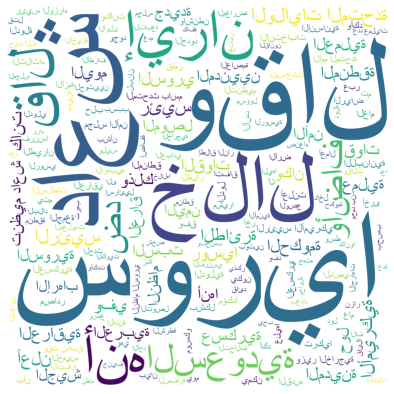

culture related words:


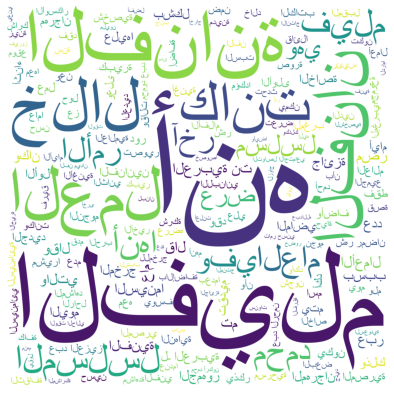

Medical related words:


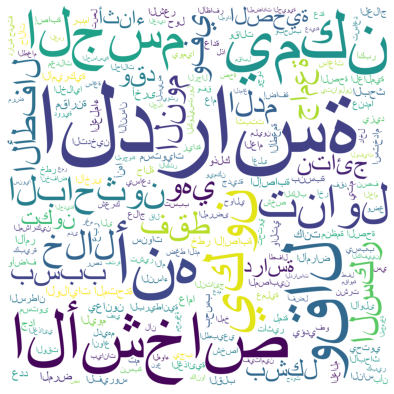

Tech related words:


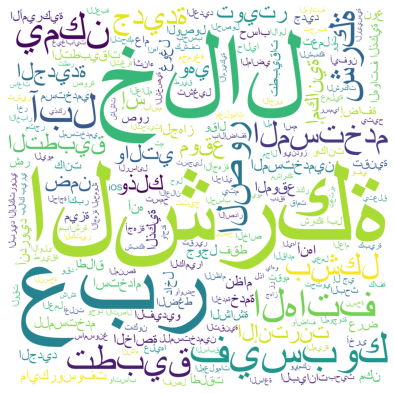

In [76]:

stop = set(stopwords.words('arabic'))

Politics = data[data['labelId'] == 0]

Politics = Politics['final_clean']

Culture = data[data['labelId'] == 1]

Culture = Culture['final_clean']

Medical = data[data['labelId'] == 2]

Medical = Medical['final_clean']

Tech = data[data['labelId'] == 3]

Tech = Tech['final_clean']


def wordcloud_draw(data, color = 'white'):
  words = ' '.join(data)
  cleaned_word = ' '.join([word for word in words.split() ])
  wordcloud = WordCloud(font_path='arial',stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("politics related words:")
wordcloud_draw(Politics, 'white')

print("culture related words:")
wordcloud_draw(Culture, 'white')

print("Medical related words:")
wordcloud_draw(Medical, 'white')

print("Tech related words:")
wordcloud_draw(Tech, 'white')


In [85]:
X = data['cleaned_text']
y = data['label']
X

0      [ 'استأجرت ' , 'مفوضية ' , 'الانتخابات ' , 'ال...
1      [ 'انتهى ' , 'أيام ' , 'فريق ' , 'المسلسل ' , ...
2      [ 'رغم ' , 'صغر ' , 'سنها، ' , 'تكون ' , 'طفلة...
3      [ 'قال ' , 'رئيس ' , 'الوزراء ' , 'الإسرائيلي ...
4      [ 'كشفت ' , 'دراسة ' , 'حديثة ' , 'النساء ' , ...
                             ...                        
418    [ 'قال ' , 'النجم ' , 'الكوميدي ' , 'الكويتي '...
419    [ 'أعلن ' , 'برلمانيون ' , 'عراقيون ' , 'مناقش...
420    [ 'نقلت ' , 'مصادر ' , 'اعلامية ' , 'اردنية ' ...
421    [ 'تستعد ' , 'الفنانة ' , 'السعودية ' , 'أسيل ...
422    [ 'دعي ' , '11 ' , 'أسترالي ' , 'للخضوع ' , 'ل...
Name: cleaned_text, Length: 423, dtype: object

In [86]:
y

0      Politics
1       Culture
2       Medical
3      Politics
4       Medical
         ...   
418     Culture
419    Politics
420    Politics
421     Culture
422     Medical
Name: label, Length: 423, dtype: object

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
X1 = np.array(data['cleaned_text'].values)
Y = np.array(data['label'].values)
cv = CountVectorizer()
x = cv.fit_transform(data['cleaned_text']).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (423, 24361)
y.shape =  (423,)


<h2 style="color: green" >DBSCAN</h2>

In [88]:
from sklearn.cluster import DBSCAN

In [89]:
clustering = DBSCAN(eps=3, min_samples=2).fit(x)
clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [90]:
clustering

DBSCAN(eps=3, min_samples=2)

In [93]:
silhouette_score(x, y)

-0.03843418558699934

In [103]:
from sklearn import metrics
# احسب DBSCAN
db=DBSCAN(eps=0.3,min_samples=10).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
labels=db.labels_
 
 # بيانات مركز الكتلة في الملصق ، متجاهلة الضوضاء المحتملة
n_clusters_=len(set(labels))-(1 if -1 in labels else 0)
n_noise_=list(labels).count(-1)
 
print('Estimated number of cluster:%d' %n_clusters_)
print('Estimated number of noise points:%d' %n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data['label'], labels))
print("Completeness: %0.3f" % metrics.completeness_score(data['label'], labels))
print("V-measure: %0.3f" % metrics.v_measure_score(data['label'], labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(x, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(x, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, labels))
 
 
 # عرض رسومي للنتائج
 
import matplotlib.pyplot as plt
 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
 
    class_member_mask = (labels == k)
 
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
 
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of cluster:0
Estimated number of noise points:423
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000


ValueError: labels_true must be 1D: shape is (423, 24361)

<h2 style="color: green" >Clustering spectrale</h2>

In [94]:
from sklearn.cluster import SpectralClustering

In [95]:
clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0).fit(x)
clustering.labels_

C:\Users\dell\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [96]:
clustering

SpectralClustering(assign_labels='discretize', n_clusters=2, random_state=0)

In [97]:
silhouette_score(x, y)

-0.03843418558699934

<h2 style="color: green" >Chameleon</h2>

<h2 style="color: green" >SOM</h2>

In [70]:
# training the SOM

from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 24361, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x, num_iteration = 100)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U1355'), dtype('float64')) -> None

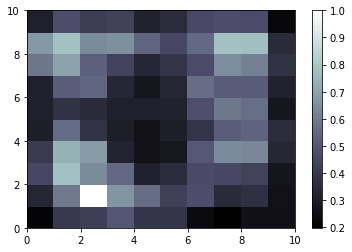

In [71]:
# visualizing the results

from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5, w[1]+0.5,
  markers[Y[i]],
  markeredgecolor = colors[Y[i]],
  markerfacecolor = 'None',
  markersize = 15,
  markeredgewidth = 2)

show()